# Stability Text to Image


In this section we talk about stability API, a cloud computing space for stable diffusion usage. 

all document can be found here
https://platform.stability.ai/

web interface and api key 
https://beta.dreamstudio.ai/dream


In [1]:
# Setting up enviornment
from base64 import b64decode
from pathlib import Path
import os
import io
import warnings
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = "your own key"

In [2]:
# Set up our connection to the API.
# select the engine using. (possible for stable diffusion 2)

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-v1-5", # Set the engine to use for generation. 
)

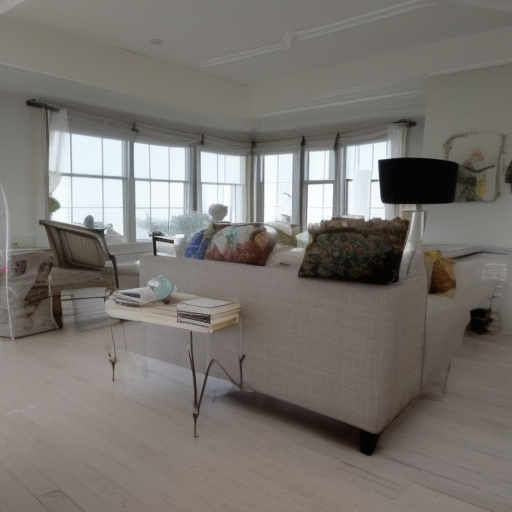

In [3]:
# Set up our initial generation parameters.
answers = stability_api.generate(
    prompt="i am sitting in a room",
    width=512, # Generation width, defaults to 512 if not included.
    height=512, # Generation height, defaults to 512 if not included.
)


IMAGE_DIR = Path.cwd() / "StableDiffusion_images"
IMAGE_DIR.mkdir(parents=True, exist_ok=True)

fileName = "image.png"
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.type == generation.ARTIFACT_IMAGE:
            image_file = IMAGE_DIR / fileName
            img = Image.open(io.BytesIO(artifact.binary))
            img.save(image_file) # Save our generated images with their seed number as the filename.
            
display(img)

# Image to Image Generation

It's also possible to run image to image generation

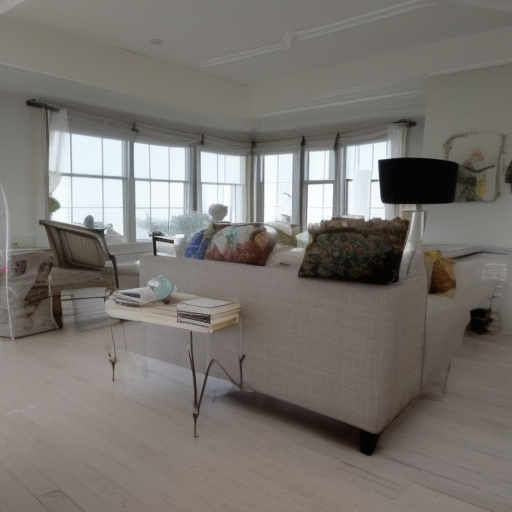

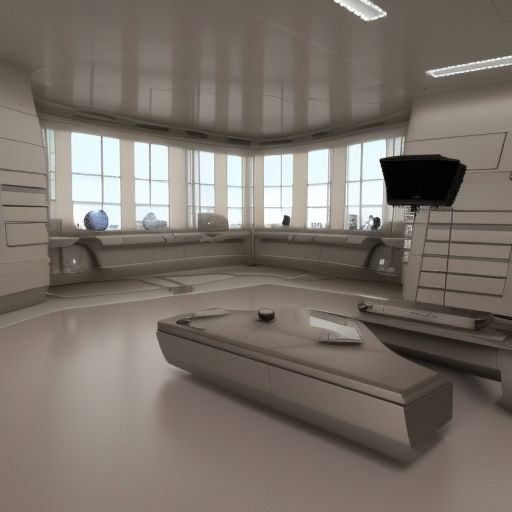

In [4]:
# Set up our initial generation parameters.

img = Image.open(image_file)

answers2 = stability_api.generate(
    prompt="sci-fi space of spaceship room",
    start_schedule=0.6, # Set the strength of our prompt in relation to our initial image.
    init_image=img, # Assign our previously generated img as our Initial Image for transformation.
    width=512, # Generation width, defaults to 512 if not included.
    height=512, # Generation height, defaults to 512 if not included.
)

IMAGE_DIR = Path.cwd() / "StableDiffusion_images"
IMAGE_DIR.mkdir(parents=True, exist_ok=True)
fileName2 = "image_img2img.png"

for resp in answers2:
    for artifact in resp.artifacts:
        if artifact.type == generation.ARTIFACT_IMAGE:
            img2 = Image.open(io.BytesIO(artifact.binary))
            
            image_file2 = IMAGE_DIR / fileName2
            img2.save(image_file2) # Save our generated image with its seed number as the filename and the img2img suffix so that we know this is our transformed image.
            
display(img)
display(img2)